In [1]:
import librosa
from librosa import display
from librosa import feature

import numpy as np
from numpy import typing as npt

from matplotlib import pyplot as plt
import soundfile as sf


In [2]:
y, sr = librosa.load("./Mozart_Turkish_March.wav", duration=45)

In [5]:
def onsets_detection(y: npt.ArrayLike, sr: int, write_to_wav: bool = True) -> None :

    o_env = librosa.onset.onset_strength(y=y, sr=sr)
    times = librosa.times_like(o_env, sr=sr)
    onset_frames = librosa.onset.onset_detect(onset_envelope=o_env, sr=sr)
    D = np.abs(librosa.stft(y))

    fig, ax = plt.subplots(nrows=2, sharex=True)
    librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max),
                             x_axis='time', y_axis='log', ax=ax[0])
    ax[0].set(title='Power spectrogram')
    ax[0].label_outer()
    ax[1].plot(times, o_env, label='Onset strength')
    ax[1].vlines(times[onset_frames], 0, o_env.max(), color='r', alpha=0.9,
                 linestyle='--', label='Onsets')
    ax[1].legend()


    if write_to_wav :
        y_onset_clicks = librosa.clicks(frames=onset_frames, sr=sr, length=len(y))
        sf.write('withOnsets.wav', y+y_onset_clicks, sr, subtype='PCM_24')

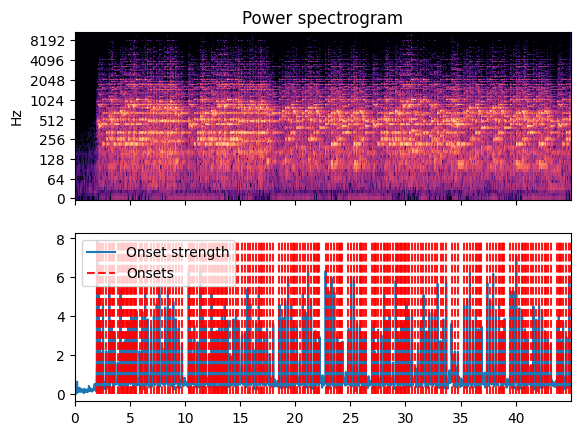

In [6]:
onsets_detection(y, sr)

In [ ]:
def beats_clicks(y: npt.ArrayLike, sr: int) -> None :

    tempo, beats = librosa.beat.beat_track(y=y, sr=sr)
    y_beats = librosa.clicks(frames=beats, sr=sr, length=len(y))

    sf.write('stereo_file.wav', y+y_beats, sr, subtype='PCM_24')


In [ ]:
beats_clicks(y, sr)

In [ ]:
chroma = librosa.feature.chroma_stft(y=y, sr=sr)
chroma

In [ ]:
np.shape(chroma)

In [ ]:
def plot_mel_spectrogram(y: npt.ArrayLike, sr: int, with_pitch : bool = True) :

    S = librosa.feature.melspectrogram(y=y, sr=sr)
    S_dB = librosa.power_to_db(S, ref=np.max)

    if with_pitch :
        
        f0, voiced_flag, voiced_probs = librosa.pyin(y,
                                                     fmin=librosa.note_to_hz('C2'),
                                                     fmax=librosa.note_to_hz('C7'))
        times = librosa.times_like(f0)

        fig, ax = plt.subplots()
        img = librosa.display.specshow(S_dB, x_axis='time',
                                       y_axis='mel', sr=sr, 
                                       fmax=8000, ax=ax)
        ax.plot(times, f0, label='f0', color='cyan', linewidth=3)
        
        ax.legend(loc='upper right')
        ax.set(title='Mel-frequency spectrogram')


    else :
        fig, ax = plt.subplots()
        img = librosa.display.specshow(S_dB, x_axis='time',
                                       y_axis='mel', sr=sr, 
                                       fmax=8000, ax=ax)

        fig.colorbar(img, ax=ax, format='%+2.0f dB')
        ax.set(title='Mel-frequency spectrogram')

In [ ]:
plot_mel_spectrogram(y, sr)

In [ ]:
def plot_constant_q_transform(y: npt.ArrayLike, sr:int) :

    C = np.abs(librosa.cqt(y, sr=sr))
    fig, ax = plt.subplots()
    img = librosa.display.specshow(librosa.amplitude_to_db(C, ref=np.max),
                                   sr=sr, x_axis='time', y_axis='cqt_note', ax=ax)

    ax.set_title('Constant-Q power spectrum')
    fig.colorbar(img, ax=ax, format="%+2.0f dB")

In [ ]:
plot_constant_q_transform(y, sr)